In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/BTL_CV/archive.zip' -d '/content/drive/MyDrive/BTL_CV'

Archive:  /content/drive/MyDrive/BTL_CV/archive.zip
  inflating: /content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/axial_t1wce_2_class.yaml  
  inflating: /content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/test/00018_101.jpg  
  inflating: /content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/test/00018_109.jpg  
  inflating: /content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/test/00018_111.jpg  
  inflating: /content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/test/00018_117.jpg  
  inflating: /content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/test/00018_121.jpg  
  inflating: /content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/test/00018_126.jpg  
  inflating: /content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/test/00018_134.jpg  
  inflating: /content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/test/00019_66.jpg  
  inflating: /content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/test/00019_75.jpg  
  inflating: /content/drive/MyDrive/BTL_C

In [2]:
!pip install ultralytics
import ultralytics
from ultralytics import YOLO
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random
!pip install wandb
import wandb
wandb.init(mode="disabled")
import shutil

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 723.1/723.1 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 84.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [7]:
image_train_dir = '/content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/train'
label_train_dir = '/content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/labels/train'

# Lấy danh sách tất cả các tệp ảnh
images = os.listdir(image_train_dir)

# Kiểm tra và xóa ảnh nếu không có nhãn tương ứng
for image in images:
    label = os.path.splitext(image)[0] + '.txt'
    if not os.path.exists(os.path.join(label_train_dir, label)):
        image_path = os.path.join(image_train_dir, image)
        os.remove(image_path)
        print(f"Removed image: {image_path}")


In [5]:
image_test_dir = '/content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/test'
label_test_dir = '/content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/labels/test'

# Lấy danh sách tất cả các tệp ảnh
images = os.listdir(image_test_dir)

# Kiểm tra và xóa ảnh nếu không có nhãn tương ứng
for image in images:
    label = os.path.splitext(image)[0] + '.txt'
    if not os.path.exists(os.path.join(label_test_dir, label)):
        image_path = os.path.join(image_test_dir, image)
        os.remove(image_path)
        print(f"Removed image: {image_path}")

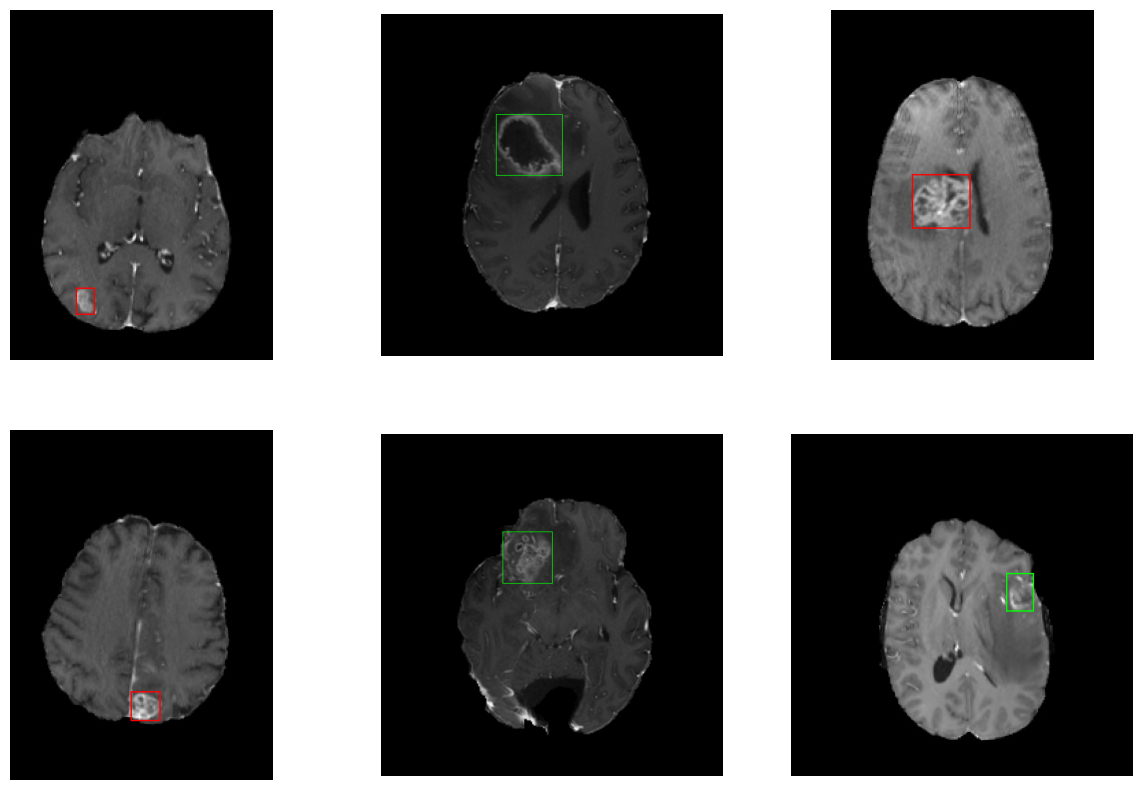

In [55]:
# Lấy danh sách tất cả các tệp trong thư mục
files = os.listdir('/content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/train')

# Tạo một list để lưu các tệp đã chọn
chosen_files = []

# Chọn 6 tệp khác nhau ngẫu nhiên
while len(chosen_files) < 6:
    random_file = random.choice(files)
    random_file = os.path.splitext(random_file)[0]  # Loại bỏ phần mở rộng tệp
    if random_file not in chosen_files:
        chosen_files.append(random_file)

# Tạo một lưới ảnh với 2 hàng và 3 cột
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, random_file in enumerate(chosen_files):
    # Lấy nhãn từ tệp tương ứng
    with open(os.path.join('/content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/labels/train', f'{random_file}.txt'), 'r') as f:
        labels = f.readlines()
        labels = labels[0].split(' ')

    img = cv2.imread(os.path.join('/content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/train', f'{random_file}.jpg'), 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    tumor_class, x, y, w, h = int(labels[0]), float(labels[1]), float(labels[2]), float(labels[3]), float(labels[4])
    x_pt1 = int((x - w/2) * img.shape[1])
    y_pt1 = int((y - h/2) * img.shape[0])
    x_pt2 = int((x + w/2) * img.shape[1])
    y_pt2 = int((y + h/2) * img.shape[0])

    if tumor_class == 1:
        colour = (255, 0, 0)  # Positive: màu đỏ
    else:
        colour = (0, 255, 0)  # Negative: màu xanh lá

    # Vẽ hình chữ nhật vào ảnh
    cv2.rectangle(img, (x_pt1, y_pt1), (x_pt2, y_pt2), colour, 1)

    # Hiển thị ảnh trên lưới
    axes[i//3, i%3].imshow(img)
    axes[i//3, i%3].axis('off')

plt.show()


In [14]:
# Tính số lượng ảnh cho tập validation
num_train_images = len(os.listdir('/content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/train'))
val_split = int(num_train_images * 0.2)

# Lấy danh sách tất cả các tệp ảnh trong thư mục train
train_images = os.listdir('/content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/train')

# Chọn ngẫu nhiên các ảnh cho tập validation
val_images = random.sample(train_images, val_split)

# Tạo thư mục val nếu chưa tồn tại
val_image_dir = '/content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/val'
val_label_dir = '/content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/labels/val'

os.makedirs(val_image_dir, exist_ok=True)
os.makedirs(val_label_dir, exist_ok=True)

# Di chuyển các ảnh và nhãn tương ứng sang thư mục val
for image in val_images:
    source_img_path = os.path.join('/content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/train', image)
    dest_img_path = os.path.join(val_image_dir, image)
    shutil.move(source_img_path, dest_img_path)

    label = os.path.splitext(image)[0] + '.txt'
    source_label_path = os.path.join('/content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/labels/train', label)
    dest_label_path = os.path.join(val_label_dir, label)
    shutil.move(source_label_path, dest_label_path)


In [18]:
train_images = os.listdir('/content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/train')
test_images = os.listdir('/content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/test')
val_images = os.listdir('/content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/val')
train_labels = os.listdir('/content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/labels/train')
test_labels = os.listdir('/content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/labels/test')
val_labels = os.listdir('/content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/labels/val')

num_train_images = len(train_images)
num_test_images = len(test_images)
num_val_images = len(val_images)
num_train_labels = len(train_labels)
num_test_labels = len(test_labels)
num_val_labels = len(val_labels)

print('Số lượng ảnh trong tập train:', num_train_images)
print('Số lượng ảnh trong tập test:', num_test_images)
print('Số lượng ảnh trong tập val:', num_val_images)

print('Số lượng label trong tập train:', num_train_labels)
print('Số lượng label trong tập test:', num_test_labels)
print('Số lượng label trong tập val:', num_val_labels)

Số lượng ảnh trong tập train: 237
Số lượng ảnh trong tập test: 75
Số lượng ảnh trong tập val: 59
Số lượng label trong tập train: 237
Số lượng label trong tập test: 75
Số lượng label trong tập val: 59


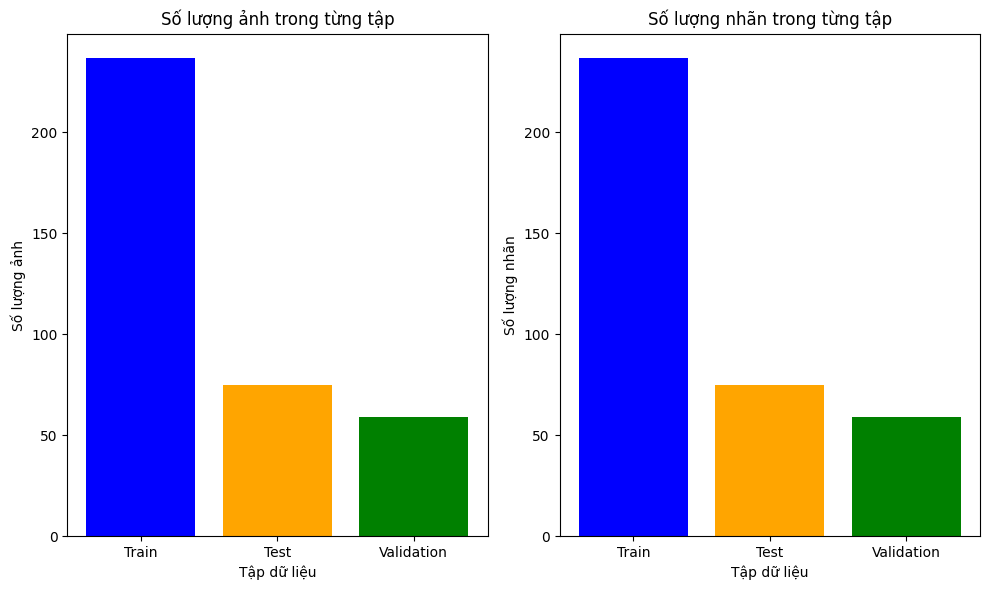

In [19]:
# Số lượng ảnh của mỗi tập
num_images = [num_train_images, num_test_images, num_val_images]
num_labels = [num_train_labels, num_test_labels, num_val_labels]
labels = ['Train', 'Test', 'Validation']

# Visual số lượng ảnh
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(labels, num_images, color=['blue', 'orange', 'green'])
plt.xlabel('Tập dữ liệu')
plt.ylabel('Số lượng ảnh')
plt.title('Số lượng ảnh trong từng tập')

plt.subplot(1, 2, 2)
plt.bar(labels, num_labels, color=['blue', 'orange', 'green'])
plt.xlabel('Tập dữ liệu')
plt.ylabel('Số lượng nhãn')
plt.title('Số lượng nhãn trong từng tập')

plt.tight_layout()
plt.show()


In [20]:
text = """
path: /content/drive/MyDrive/BTL_CV/axial_t1wce_2_class
train: images/train
val: images/val

# Classes
nc: 2
names: ['negative','positive']
"""
with open("/content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/fixed_path.yaml", 'w') as file:
    file.write(text)

In [21]:
model = YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 234MB/s]


In [22]:
results = model.train(data='/content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/fixed_path.yaml', epochs=100, device=0)

Ultralytics YOLOv8.1.37 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/fixed_path.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

100%|██████████| 755k/755k [00:00<00:00, 26.5MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 114MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/labels/train... 237 images, 0 backgrounds, 0 corrupt: 100%|██████████| 237/237 [01:35<00:00,  2.49it/s]


train: New cache created: /content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/labels/val... 59 images, 0 backgrounds, 0 corrupt: 100%|██████████| 59/59 [00:19<00:00,  2.99it/s]

val: New cache created: /content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.23G      1.787      5.424      1.521         18        640: 100%|██████████| 15/15 [00:08<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]

                   all         59         61      0.299      0.248      0.199      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.32G      1.244      2.373      1.162         21        640: 100%|██████████| 15/15 [00:04<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         59         61      0.327      0.415      0.269      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.35G      1.244      2.028      1.168         25        640: 100%|██████████| 15/15 [00:06<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         59         61      0.168       0.48     0.0887     0.0586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.33G      1.297      1.684      1.198         23        640: 100%|██████████| 15/15 [00:05<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         59         61      0.113      0.314      0.124     0.0754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.33G      1.205      1.633      1.144         27        640: 100%|██████████| 15/15 [00:04<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         59         61     0.0936      0.157     0.0539     0.0227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.33G      1.188       1.58      1.099         25        640: 100%|██████████| 15/15 [00:05<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         59         61      0.109      0.148     0.0475     0.0296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.36G      1.291      1.475       1.17         20        640: 100%|██████████| 15/15 [00:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all         59         61      0.413      0.711      0.547      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       4.5G      1.214      1.386       1.13         25        640: 100%|██████████| 15/15 [00:08<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         59         61      0.473      0.541      0.454      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.33G      1.153      1.264      1.105         21        640: 100%|██████████| 15/15 [00:05<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all         59         61      0.278      0.682      0.385       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.36G      1.186      1.304      1.129         33        640: 100%|██████████| 15/15 [00:04<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         59         61      0.601      0.468      0.443      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.34G      1.167      1.199      1.095         31        640: 100%|██████████| 15/15 [00:06<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         59         61     0.0299     0.0571       0.02     0.0064



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.49G      1.167      1.231      1.107         30        640: 100%|██████████| 15/15 [00:04<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         59         61     0.0541     0.0571     0.0257    0.00765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.33G      1.148      1.174      1.104         22        640: 100%|██████████| 15/15 [00:04<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         59         61      0.763      0.257      0.275      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.34G      1.078      1.134      1.078         28        640: 100%|██████████| 15/15 [00:04<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all         59         61       0.76      0.674      0.721      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.33G      1.075     0.9716      1.029         24        640: 100%|██████████| 15/15 [00:04<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         59         61      0.543      0.554      0.561      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.49G      1.088      1.047      1.082         20        640: 100%|██████████| 15/15 [00:04<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         59         61       0.62      0.764      0.687      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.49G       1.04      1.026      1.044         20        640: 100%|██████████| 15/15 [00:04<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         59         61      0.536      0.798      0.665      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.52G      1.106      1.011      1.072         21        640: 100%|██████████| 15/15 [00:04<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         59         61      0.358      0.501      0.468      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.34G      1.131     0.9795      1.086         18        640: 100%|██████████| 15/15 [00:04<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         59         61      0.294      0.391      0.303      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.51G      1.038     0.9777      1.036         22        640: 100%|██████████| 15/15 [00:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         59         61      0.584      0.768      0.735      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.33G      1.019     0.9167      1.039         22        640: 100%|██████████| 15/15 [00:04<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         59         61      0.707      0.756      0.805      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.36G        1.1      1.014       1.09         19        640: 100%|██████████| 15/15 [00:04<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         59         61      0.711      0.791        0.8      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.33G      1.039     0.9328      1.047         18        640: 100%|██████████| 15/15 [00:05<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         59         61       0.61      0.674      0.695      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       4.5G      1.039     0.8866      1.054         20        640: 100%|██████████| 15/15 [00:04<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         59         61      0.826      0.803      0.861       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.49G      1.021     0.9158      1.053         20        640: 100%|██████████| 15/15 [00:05<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         59         61      0.793      0.605       0.66      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       4.5G       1.02     0.8526      1.039         25        640: 100%|██████████| 15/15 [00:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         59         61      0.888      0.799      0.882      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.49G     0.9753     0.8458      1.039         14        640: 100%|██████████| 15/15 [00:04<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         59         61      0.836      0.863      0.871      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.49G     0.9465      0.793       1.01         29        640: 100%|██████████| 15/15 [00:04<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         59         61      0.802      0.778      0.864      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.33G     0.9433     0.7822     0.9962         20        640: 100%|██████████| 15/15 [00:04<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         59         61      0.812      0.821      0.848      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.34G     0.9608      0.827          1         18        640: 100%|██████████| 15/15 [00:04<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         59         61      0.593      0.606      0.643      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.49G     0.9833     0.8264      1.038         30        640: 100%|██████████| 15/15 [00:04<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         59         61      0.818      0.843      0.896      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.49G     0.9086     0.7274      0.986         34        640: 100%|██████████| 15/15 [00:04<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         59         61      0.781       0.82       0.85      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.33G     0.9665     0.7696      1.015         20        640: 100%|██████████| 15/15 [00:04<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         59         61      0.767      0.841      0.871      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.34G     0.9268     0.7198     0.9963         22        640: 100%|██████████| 15/15 [00:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         59         61      0.731      0.816      0.795      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.36G      0.955     0.7464     0.9945         37        640: 100%|██████████| 15/15 [00:04<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         59         61        0.9      0.764      0.887      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.49G     0.8903     0.7328     0.9808         26        640: 100%|██████████| 15/15 [00:07<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         59         61      0.831       0.82      0.889      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.49G     0.9272     0.7318     0.9844         30        640: 100%|██████████| 15/15 [00:04<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         59         61      0.808      0.852      0.881      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.52G     0.9063      0.742     0.9812         27        640: 100%|██████████| 15/15 [00:05<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         59         61      0.743      0.888      0.874      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.35G     0.9575     0.7764       1.03         27        640: 100%|██████████| 15/15 [00:04<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all         59         61      0.811      0.831      0.885      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.51G     0.8878     0.7169     0.9703         26        640: 100%|██████████| 15/15 [00:06<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         59         61      0.898      0.846      0.925       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.33G      0.881      0.665     0.9846         28        640: 100%|██████████| 15/15 [00:04<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all         59         61      0.802      0.919        0.9      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.34G     0.8941     0.6797     0.9895         17        640: 100%|██████████| 15/15 [00:05<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         59         61       0.88      0.807      0.907      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.35G      0.874     0.6301     0.9734         29        640: 100%|██████████| 15/15 [00:05<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         59         61      0.739      0.616      0.655      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       4.5G     0.9135     0.6926       1.01         13        640: 100%|██████████| 15/15 [00:04<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         59         61      0.804      0.883      0.907      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.33G     0.8474     0.6507     0.9676         24        640: 100%|██████████| 15/15 [00:05<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all         59         61      0.824      0.718      0.807      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.34G     0.8904     0.7006     0.9959         25        640: 100%|██████████| 15/15 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         59         61      0.896      0.832      0.899      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.34G     0.8348     0.6329     0.9666         26        640: 100%|██████████| 15/15 [00:04<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all         59         61      0.925      0.818      0.915      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.49G     0.8355     0.6083     0.9526         25        640: 100%|██████████| 15/15 [00:04<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         59         61      0.827      0.842      0.927      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.33G     0.7863     0.6057     0.9589         19        640: 100%|██████████| 15/15 [00:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         59         61      0.877      0.866      0.924      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.36G     0.8646     0.6129     0.9878         18        640: 100%|██████████| 15/15 [00:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         59         61      0.764      0.751      0.773      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.36G     0.8305     0.6185     0.9537         22        640: 100%|██████████| 15/15 [00:04<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         59         61      0.745      0.923      0.883      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.52G     0.8463     0.5911     0.9928         17        640: 100%|██████████| 15/15 [00:04<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         59         61      0.869      0.765      0.868       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.33G     0.7906     0.5642     0.9597         27        640: 100%|██████████| 15/15 [00:05<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         59         61      0.833      0.772      0.864      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.34G     0.8244     0.5992     0.9599         18        640: 100%|██████████| 15/15 [00:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         59         61      0.743      0.842       0.85      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.35G     0.8444     0.5985     0.9723         17        640: 100%|██████████| 15/15 [00:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all         59         61       0.89      0.933      0.927       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100       4.5G     0.7867     0.5546     0.9427         24        640: 100%|██████████| 15/15 [00:05<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         59         61      0.849      0.912       0.94      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.33G     0.8157     0.5545     0.9593         19        640: 100%|██████████| 15/15 [00:05<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         59         61       0.84      0.875      0.914      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.34G      0.781     0.5505     0.9543         21        640: 100%|██████████| 15/15 [00:04<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         59         61      0.828      0.763      0.848      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.35G     0.8015     0.5876     0.9374         23        640: 100%|██████████| 15/15 [00:05<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         59         61       0.83      0.852      0.914      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.51G     0.8135      0.515      0.976         23        640: 100%|██████████| 15/15 [00:04<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         59         61      0.868      0.861      0.922      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.33G     0.7798     0.5213     0.9402         32        640: 100%|██████████| 15/15 [00:04<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         59         61      0.853      0.862      0.903      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.34G     0.7971     0.5337     0.9509         21        640: 100%|██████████| 15/15 [00:05<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         59         61      0.858      0.837      0.921      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       4.5G     0.7788     0.5274     0.9386         22        640: 100%|██████████| 15/15 [00:05<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         59         61       0.87      0.837      0.898      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       4.5G     0.8302     0.5766     0.9726         25        640: 100%|██████████| 15/15 [00:04<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         59         61       0.91      0.687      0.865      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.33G     0.7376     0.4948     0.9277         32        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         59         61      0.811      0.885       0.92      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.34G     0.7529     0.5134     0.9475         27        640: 100%|██████████| 15/15 [00:04<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         59         61      0.877      0.876      0.917      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.35G     0.7666     0.5046     0.9433         22        640: 100%|██████████| 15/15 [00:05<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         59         61      0.841       0.89      0.917      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.51G     0.7517     0.5101     0.9362         19        640: 100%|██████████| 15/15 [00:04<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         59         61       0.87      0.821        0.9      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.33G     0.7317     0.4711     0.9319         20        640: 100%|██████████| 15/15 [00:05<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         59         61      0.887      0.898      0.964      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.34G     0.7816     0.4965     0.9571         19        640: 100%|██████████| 15/15 [00:04<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         59         61      0.824      0.858      0.899      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.34G      0.692     0.4622     0.8965         23        640: 100%|██████████| 15/15 [00:05<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         59         61      0.919      0.912      0.964       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100       4.5G     0.7391     0.4942     0.9332         22        640: 100%|██████████| 15/15 [00:04<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         59         61      0.881      0.913      0.952      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.33G     0.7062      0.464     0.9148         19        640: 100%|██████████| 15/15 [00:04<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         59         61      0.822       0.93      0.955       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.34G     0.6914     0.4449     0.9209         23        640: 100%|██████████| 15/15 [00:04<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         59         61      0.874      0.837      0.935      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.34G     0.7212     0.4712     0.9391         28        640: 100%|██████████| 15/15 [00:04<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         59         61       0.89      0.819      0.944      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       4.5G     0.6863      0.449     0.9211         23        640: 100%|██████████| 15/15 [00:04<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         59         61      0.894       0.84      0.906       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.33G     0.6932     0.4252     0.9468         21        640: 100%|██████████| 15/15 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         59         61      0.883      0.892      0.933      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.36G     0.6831     0.4611     0.9173         27        640: 100%|██████████| 15/15 [00:04<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         59         61      0.911      0.928      0.958        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.34G     0.6937     0.4494     0.9296         24        640: 100%|██████████| 15/15 [00:04<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         59         61      0.885      0.928      0.956      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.51G     0.6805     0.4409     0.9076         34        640: 100%|██████████| 15/15 [00:05<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         59         61      0.876      0.961      0.961      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.49G      0.657     0.4362     0.9224         27        640: 100%|██████████| 15/15 [00:04<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         59         61      0.914      0.872      0.939      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.34G       0.68     0.4291     0.9039         20        640: 100%|██████████| 15/15 [00:05<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         59         61      0.853      0.923      0.936      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.51G     0.5982     0.3987     0.8959         21        640: 100%|██████████| 15/15 [00:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         59         61       0.95      0.823      0.931       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100       4.5G     0.6109     0.3939     0.9109         21        640: 100%|██████████| 15/15 [00:05<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         59         61      0.898      0.853      0.921      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.33G     0.6174     0.4303     0.9045         24        640: 100%|██████████| 15/15 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         59         61       0.91       0.82      0.899      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.35G     0.5967     0.3758     0.8919         20        640: 100%|██████████| 15/15 [00:06<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         59         61      0.879      0.884      0.932      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       4.5G     0.6114     0.3823     0.8867         25        640: 100%|██████████| 15/15 [00:05<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all         59         61      0.847      0.957      0.954        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.49G     0.6425     0.3852     0.8965         17        640: 100%|██████████| 15/15 [00:05<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         59         61       0.93      0.884      0.963      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.33G     0.5968     0.3929     0.8739         27        640: 100%|██████████| 15/15 [00:06<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all         59         61      0.887      0.951      0.972      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.52G     0.5972     0.3962      0.904         22        640: 100%|██████████| 15/15 [00:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         59         61      0.931      0.933      0.967      0.726


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.51G      0.578     0.3652     0.8861         13        640: 100%|██████████| 15/15 [00:08<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         59         61      0.934      0.927      0.971      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.51G     0.5571      0.339     0.8586         13        640: 100%|██████████| 15/15 [00:04<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         59         61      0.954      0.881      0.968       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.33G      0.529     0.3124     0.8695         13        640: 100%|██████████| 15/15 [00:04<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         59         61      0.953       0.88      0.962       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.34G     0.5289     0.2967     0.8367         14        640: 100%|██████████| 15/15 [00:04<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         59         61      0.973      0.919      0.962      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.52G     0.5184     0.2945     0.8557         14        640: 100%|██████████| 15/15 [00:06<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         59         61      0.965      0.908      0.964      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.49G     0.5158      0.296     0.8606         13        640: 100%|██████████| 15/15 [00:06<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         59         61      0.924      0.952      0.966      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.33G      0.508     0.3035     0.8634         14        640: 100%|██████████| 15/15 [00:04<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         59         61       0.92      0.961      0.973      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.34G      0.524     0.3137     0.8542         13        640: 100%|██████████| 15/15 [00:07<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         59         61      0.935      0.966      0.974       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.34G     0.5008     0.2821     0.8495         13        640: 100%|██████████| 15/15 [00:04<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         59         61      0.959      0.915      0.966      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.49G     0.4886     0.2879     0.8503         13        640: 100%|██████████| 15/15 [00:05<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         59         61      0.952      0.914      0.964       0.72



100 epochs completed in 0.202 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.37 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]


                   all         59         61       0.96      0.915      0.965      0.732
              negative         59         26          1      0.888      0.985      0.715
              positive         59         35       0.92      0.943      0.946      0.749
Speed: 0.2ms preprocess, 5.1ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train


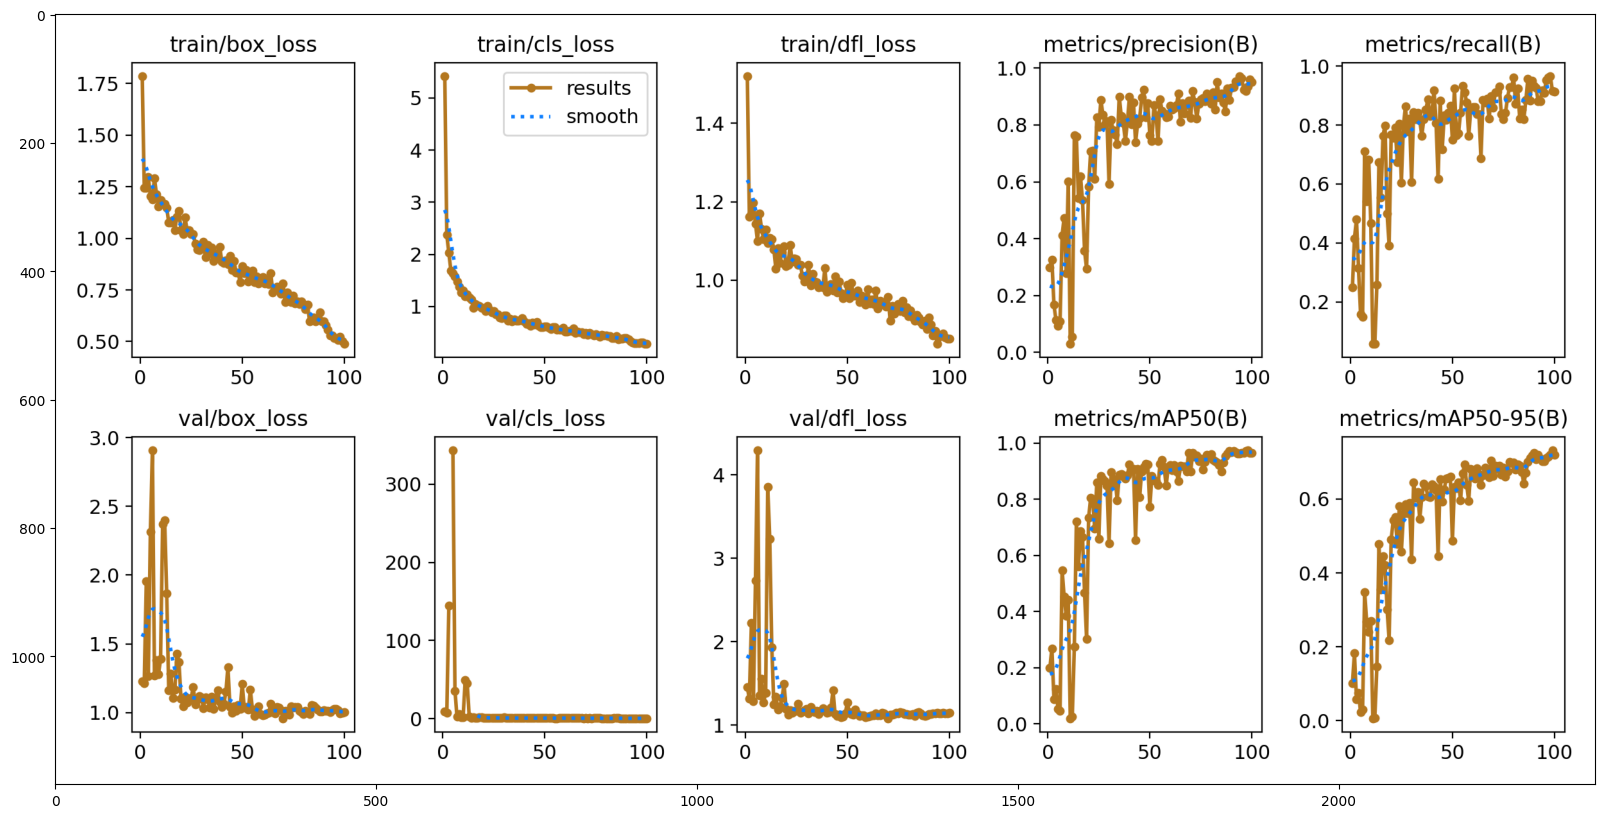

In [23]:
training_save_dir = '/content/' + str(results.save_dir)

plt.figure(figsize=(20, 10))
img = cv2.imread(os.path.join(training_save_dir, 'results.png'))
plt.imshow(img)
plt.show()

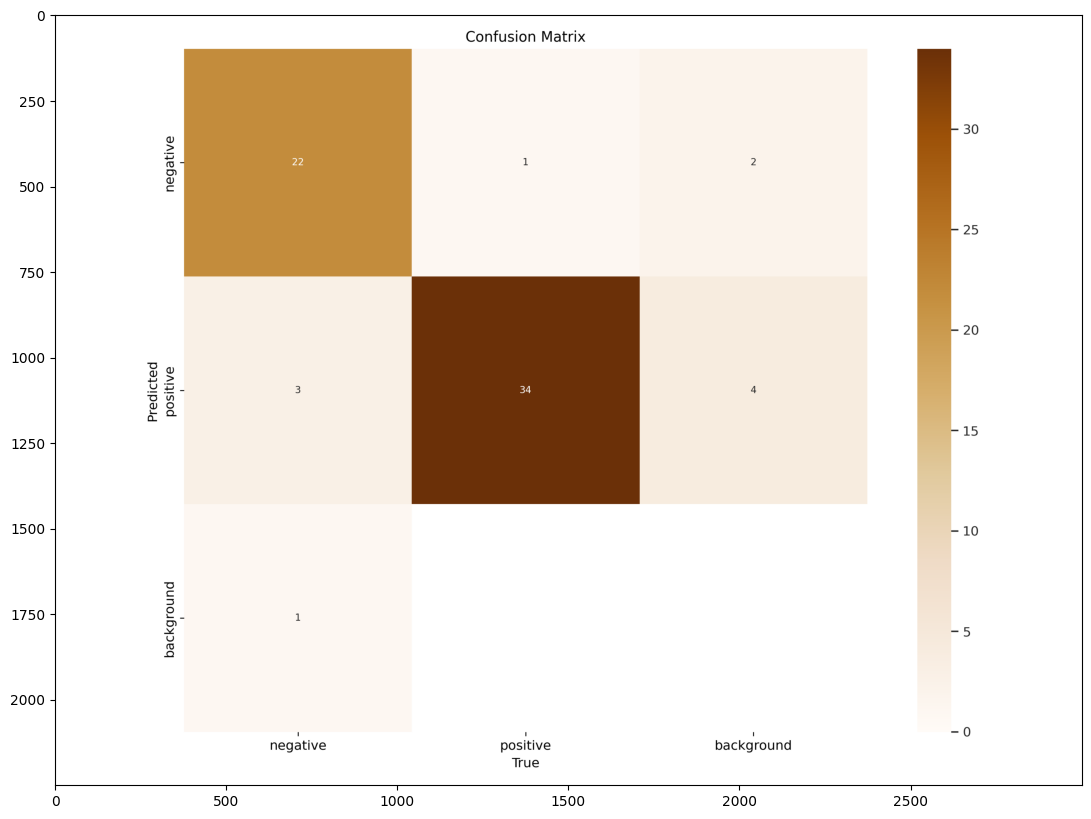

In [24]:
plt.figure(figsize=(20, 10))
img = cv2.imread(os.path.join(training_save_dir, 'confusion_matrix.png'))
plt.imshow(img)
plt.show()

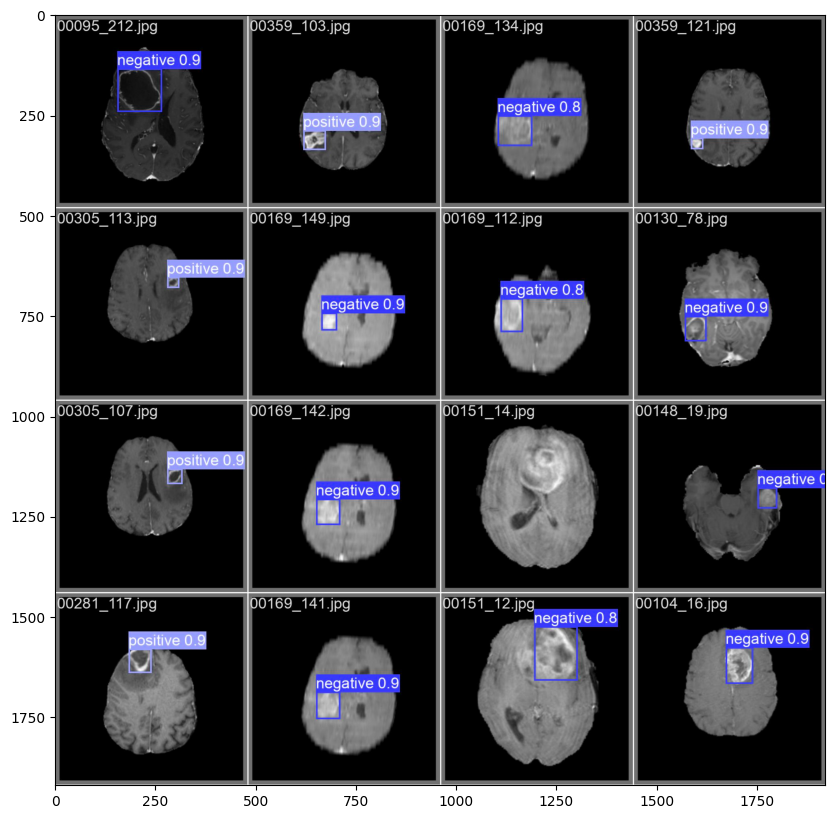

In [25]:
plt.figure(figsize=(20, 10))
img = cv2.imread(os.path.join(training_save_dir, 'val_batch0_pred.jpg'))
plt.imshow(img)
plt.show()

In [26]:
trained_model = YOLO(training_save_dir + '/weights/best.pt')
predictions = trained_model.predict(
    source="/content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/test",
    conf=0.4, save_txt=True, save_conf=True)


image 1/75 /content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/test/00018_101.jpg: 640x640 1 negative, 16.6ms
image 2/75 /content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/test/00018_109.jpg: 640x640 1 negative, 16.8ms
image 3/75 /content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/test/00018_111.jpg: 640x640 2 negatives, 16.8ms
image 4/75 /content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/test/00018_117.jpg: 640x640 1 negative, 16.5ms
image 5/75 /content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/test/00018_121.jpg: 640x640 1 negative, 16.5ms
image 6/75 /content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/test/00018_126.jpg: 640x640 1 negative, 16.5ms
image 7/75 /content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/test/00018_134.jpg: 640x640 1 negative, 16.5ms
image 8/75 /content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/test/00019_66.jpg: 640x640 1 negative, 16.5ms
image 9/75 /content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/test/00019_

In [29]:
# Hàm vẽ bounding box
def draw_bbox(file_path, filename, img):
    with open(os.path.join(file_path, f'{filename}.txt'),'r') as f:
        labels = f.readlines()
        labels = labels[0].split(' ')
        f.close()

    tumor_class, x, y, w, h = int(labels[0]), float(labels[1]), float(labels[2]), float(labels[3]), float(labels[4])
    x_pt1 = int((x - w/2) * img.shape[1])
    y_pt1 = int((y - h/2) * img.shape[0])
    x_pt2 = int((x + w/2) * img.shape[1])
    y_pt2 = int((y + h/2) * img.shape[0])

    if tumor_class == 0:
        colour = (255, 0, 0)
        label = 'Negative'
    else:
        colour = (0, 255, 0)
        label = 'Positive'
    if len(labels) > 5:
        prob = float(labels[5])
        prob = round(prob, 1)
        prob = str(prob)
        label = label + ' ' + prob

    cv2.rectangle(img, (x_pt1, y_pt1), (x_pt2, y_pt2), colour, 1)
    cv2.putText(img, label, (x_pt1, y_pt1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, colour, 1)


In [30]:
predictions_save_dir = '/content/' + predictions[0].save_dir + '/labels'

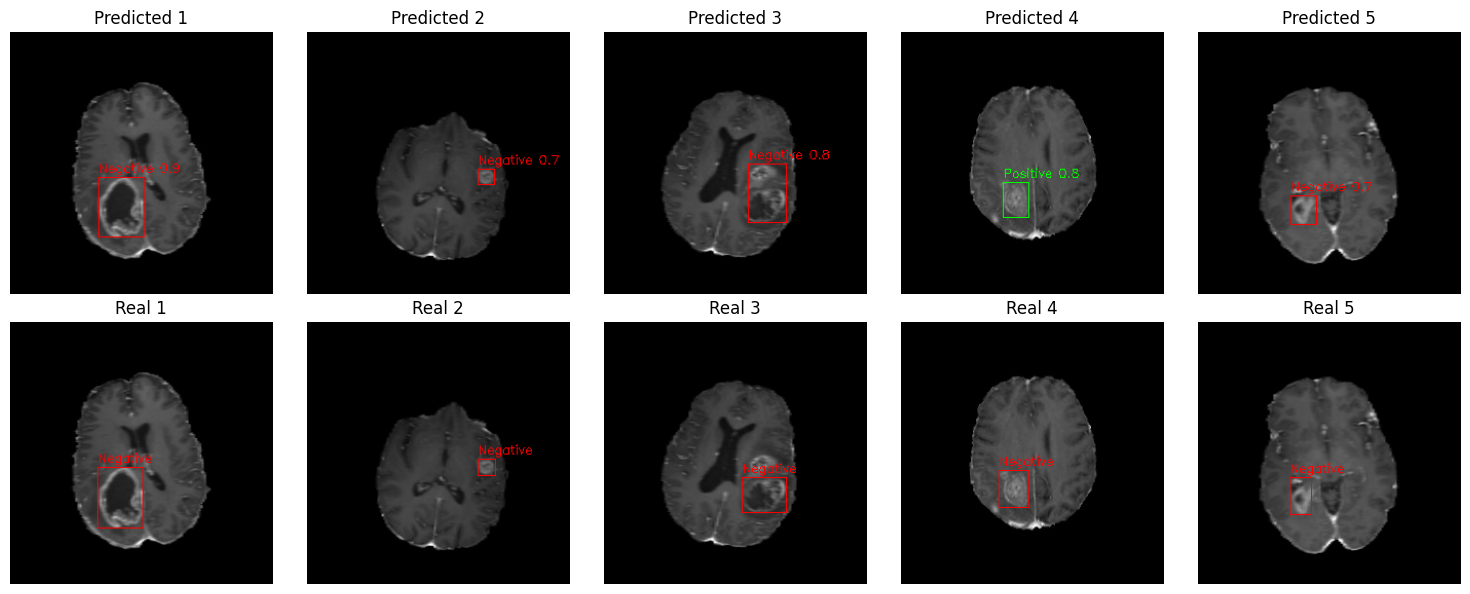

In [49]:
# Số lượng kết quả dự đoán muốn hiển thị
num_results = 5

# Tạo một lưới ảnh để hiển thị kết quả
fig, axes = plt.subplots(2, num_results, figsize=(15, 6))

for i in range(num_results):
    # Chọn ngẫu nhiên một tệp dự đoán
    files = os.listdir(predictions_save_dir)
    random_file = random.choice(files)
    random_file = os.path.splitext(random_file)[0]

    # Đọc ảnh và vẽ bounding box cho dự đoán
    img_pred = cv2.imread(os.path.join('/content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/test', f'{random_file}.jpg'), 1)
    img_pred = cv2.cvtColor(img_pred, cv2.COLOR_BGR2RGB)
    draw_bbox(predictions_save_dir, random_file, img_pred)

    # Đọc ảnh thực và vẽ bounding box cho nhãn thực
    img_real = cv2.imread(os.path.join('/content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/images/test', f'{random_file}.jpg'), 1)
    img_real = cv2.cvtColor(img_real, cv2.COLOR_BGR2RGB)
    draw_bbox('/content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/labels/test', random_file, img_real)

    # Hiển thị kết quả dự đoán và thực tế
    axes[0, i].imshow(img_pred)
    axes[0, i].set_title(f'Predicted {i+1}')
    axes[0, i].axis('off')

    axes[1, i].imshow(img_real)
    axes[1, i].set_title(f'Real {i+1}')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

In [51]:
test_label_dir = '/content/drive/MyDrive/BTL_CV/axial_t1wce_2_class/labels/test'

# Đếm số lượng positive và negative trong label của tập test
num_positive = 0
num_negative = 0

for label_file in test_labels:
    label_path = os.path.join(test_label_dir, label_file)
    with open(label_path, 'r') as f:
        label_info = f.readline().strip().split()  # Đọc và tách thông tin label
        label_class = int(label_info[0])  # Lấy lớp từ label
        if label_class == 0:  # Negative
            num_negative += 1
        elif label_class == 1:  # Positive
            num_positive += 1
        else:
            print(f"Label '{label_info}' không hợp lệ trong file '{label_file}'")

print('Số lượng positive trong tập test:', num_positive)
print('Số lượng negative trong tập test:', num_negative)


Số lượng positive trong tập test: 0
Số lượng negative trong tập test: 75


In [42]:
# Lưu model đã train
model.save('/content/drive/MyDrive/BTL_CV/trained_yolov8_model.pt')